<a href="https://colab.research.google.com/github/Ivan-Caringal/Role-Based-Authentication-System-with-Admin-Approval/blob/main/Caringal_Teves_Abellera_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-12-07 10:50:46.274483


In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-12-07 10:50:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-12-07 10:50:47 (64.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data

--2024-12-07 10:50:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-12-07 10:50:47 (78.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

df = pd.read_csv("/content/amazon_alexa.tsv", sep="\t")


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")


Training set size: 2520
Test set size: 630


In [ ]:
train_df.to_csv("train.csv", index=False)

test_df.to_csv("test.csv", index=False)

print("Files saved successfully!")


Files saved successfully!


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
   rating       date                     variation  \
0       5  30-Jul-18  Configuration: Fire TV Stick   
1       5  30-Jul-18  Configuration: Fire TV Stick   
2       2  30-Jul-18  Configuration: Fire TV Stick   
3       4  30-Jul-18                    White  Dot   
4       4  29-Jul-18              Charcoal Fabric    

                                    verified_reviews  feedback  
0  Just the perfect cost effective solution.  Tha...         1  
1  I purchased the Fire Stick to be able to watch...         1  
2  I’m very unhappy with this Firestick, every ti...         0  
3  Handy if you don't expect much out of it much ...         1  
4                  Good quality, great sound quality         1  

Test DataFrame:
   rating       date             variation  \
0       5  30-Jul-18            Black  Dot   
1       5  29-Jul-18  Heather Gray Fabric    
2       5  17-Jul-18           Black  Spot   
3       5  26-Jul-18           Black  Spot   
4       5  30-Jul-18 

In [ ]:
train_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,30-Jul-18,Configuration: Fire TV Stick,Just the perfect cost effective solution. Tha...,1
1,5,30-Jul-18,Configuration: Fire TV Stick,I purchased the Fire Stick to be able to watch...,1
2,2,30-Jul-18,Configuration: Fire TV Stick,"I’m very unhappy with this Firestick, every ti...",0
3,4,30-Jul-18,White Dot,Handy if you don't expect much out of it much ...,1
4,4,29-Jul-18,Charcoal Fabric,"Good quality, great sound quality",1


In [ ]:
value_counts = train_df['feedback'].value_counts()

print("Value counts in the training set:")
print(value_counts)

Value counts in the training set:
feedback
1    2321
0     199
Name: count, dtype: int64


In [ ]:
train_df = train_df.drop(columns=['date','variation','rating'])
test_df = test_df.drop(columns=['date','variation','rating'])




In [ ]:
train_df.head(2)

,verified_reviews,feedback
0,Just the perfect cost effective solution. Tha...,1
1,I purchased the Fire Stick to be able to watch...,1


In [ ]:
test_df.head(2)

,verified_reviews,feedback
0,"Love it, we are still learning the capabilitie...",1
1,Very easy setup.,1


In [ ]:
train_df.feedback.value_counts()

,count
feedback,
1,2321
0,199


In [ ]:
test_df.feedback.value_counts()

,count
feedback,
1,572
0,58


In [ ]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 2520
Total test samples: 630
Total samples: 3150


removing null

In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()

train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')

<ipython-input-18-7b9185e3e23c>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df = train_df.fillna(method='ffill')
<ipython-input-18-7b9185e3e23c>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = test_df.fillna(method='ffill')


In [ ]:
train_df.head(2)

,verified_reviews,feedback
0,Just the perfect cost effective solution. Tha...,1
1,I purchased the Fire Stick to be able to watch...,1


In [ ]:
train_df['verified_reviews'].isnull().sum()

0

In [ ]:
train_df['feedback'].isnull().sum()

0

In [ ]:
test_df['verified_reviews'].isnull().sum()

0

In [ ]:
test_df['feedback'].isnull().sum()

0

cleaning

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.5 MB/s eta 0:00:00


In [ ]:
import re
import emoji

def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

train_df["verified_reviews"]=train_df["verified_reviews"].apply(cleaning)

applying lematization

In [ ]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['verified_reviews'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['verified_reviews'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data

In [ ]:
import random
train_df_shuffled = train_df.sample(frac=1)
random_index = random.randint(0, len(train_df_shuffled)-5)
for row in train_df_shuffled[["verified_reviews", "feedback"]][random_index:random_index+5].itertuples():
  _, verified_reviews, feedback = row
  print(f"Target: {feedback}", "(positive)" if feedback > 0 else "(negative)")
  print(f"Text:\n{verified_reviews}\n")
  print("---\n")

Target: 1 (positive)
Text:
i m a fan of echo devices  i think it s a great alternative to a clean clock  i like using it to adjust the lightning in the room and listening to sounds to help sleep  my two year old sleeps so much better with it on  we also use it to tell my two year old stories  only issue is the volume of alexa speaking when you tell her to turn off the lights is loud when the volume is set to what you want to listen to the music at night

---

Target: 1 (positive)
Text:
very easy to set up  works wonderful and i love it  

---

Target: 1 (positive)
Text:
great device  responsive and helpful

---

Target: 1 (positive)
Text:
worked as advertised  

---

Target: 1 (positive)
Text:
fun item to play with and get used to using   sometimes has hard time answering the questions you ask  but i think it will be better 

---



In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled["verified_reviews"].to_numpy(),
    train_df_shuffled["feedback"].to_numpy(),
    test_size=0.1,
    random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(2267, 2267, 252, 252)

convert ext to number

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)


In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

25

In [ ]:
max_vocab_length = 10000
max_length = 30

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[ 1,  7,  1, 18,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
easy to use and fast setup      

Vectorized version:


<tf.Tensor: shape=(1, 30), dtype=int64, numpy=
array([[ 41,   5,  33,   6, 417, 174,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 3503
Top 5 most common words: ['', '[UNK]', 'the', 'i', 'it']
Bottom 5 least common words: ['acceptable', 'absolutly', 'above', 'abd', 'abay']


word embedding

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")

embedding

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding_1, built=False>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
love it           

Embedded version:


<tf.Tensor: shape=(1, 30, 128), dtype=float32, numpy=
array([[[ 0.03110169,  0.04955732, -0.01823841, ...,  0.02220314,
         -0.04591693, -0.00712981],
        [ 0.00918741, -0.02820269, -0.02087866, ..., -0.0150965 ,
         -0.0087832 ,  0.01305554],
        [-0.02925858,  0.03276813, -0.01415019, ..., -0.01539617,
         -0.00692778,  0.03010693],
        ...,
        [-0.02925858,  0.03276813, -0.01415019, ..., -0.01539617,
         -0.00692778,  0.03010693],
        [-0.02925858,  0.03276813, -0.01415019, ..., -0.01539617,
         -0.00692778,  0.03010693],
        [-0.02925858,  0.03276813, -0.01415019, ..., -0.01539617,
         -0.00692778,  0.03010693]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03110169,  0.04955732, -0.01823841, -0.03123698,  0.00933459,
        0.01556284,  0.03362615, -0.006709  , -0.0224721 ,  0.03081271,
       -0.03293506,  0.02343472,  0.00881488,  0.0330685 ,  0.02936764,
       -0.03378587,  0.02173083, -0.0278101 , -0.04386742, -0.02898554,
       -0.03856453,  0.0421998 ,  0.02975842, -0.02958422, -0.02294588,
        0.00307821,  0.00272141, -0.01442193, -0.04510186,  0.02166501,
       -0.01859832,  0.00428987, -0.02333119, -0.02915385,  0.04526657,
       -0.01503749,  0.04102169, -0.00038575, -0.03101988, -0.00714415,
       -0.02202913,  0.00184286, -0.02513374,  0.04992853, -0.03511886,
       -0.01542126, -0.04100051, -0.00573971, -0.04866445, -0.00984019,
        0.00389884, -0.01547641, -0.04724945, -0.01282664,  0.03720151,
        0.0414638 , -0.03063384, -0.0299854 ,  0.0240158 , -0.01922392,
       -0.04224249, -0.01452612,  0.03575833,  0.03381057,  0.01555171,
        0.036447

create baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 87.70%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10000]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """

  model_accuracy = accuracy_score(y_true, y_pred) * 100

  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 87.6984126984127,
 'precision': 0.7691011589821113,
 'recall': 0.876984126984127,
 'f1': 0.819507366018994}

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Dropout(0.5)(x)

x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
model_2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                loss="binary_crossentropy",
                metrics=["accuracy"])

model_2.summary()

Model: "model_2_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 30)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 30, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,449 (5.46 MB)

 Trainable params: 1,432,449 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
learning_rate = 0.001

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=["accuracy"])


In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=15,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20241207-105532
Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.9153 - loss: 0.3521 - val_accuracy: 0.8770 - val_loss: 0.3935
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9351 - loss: 0.2185 - val_accuracy: 0.8810 - val_loss: 0.4124
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.9580 - loss: 0.1669 - val_accuracy: 0.8849 - val_loss: 0.4048
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.9646 - loss: 0.1476 - val_accuracy: 0.8849 - val_loss: 0.4406
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.9649 - loss: 0.1449 - val_accuracy: 0.8770 - val_loss: 0.3907
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9774 - loss: 0.1000 - val_accuracy: 0.8770 - val_loss: 0.4597
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.9797 - loss: 0.0816 - val_accuracy: 0.8690 - val_loss: 0.4072
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 

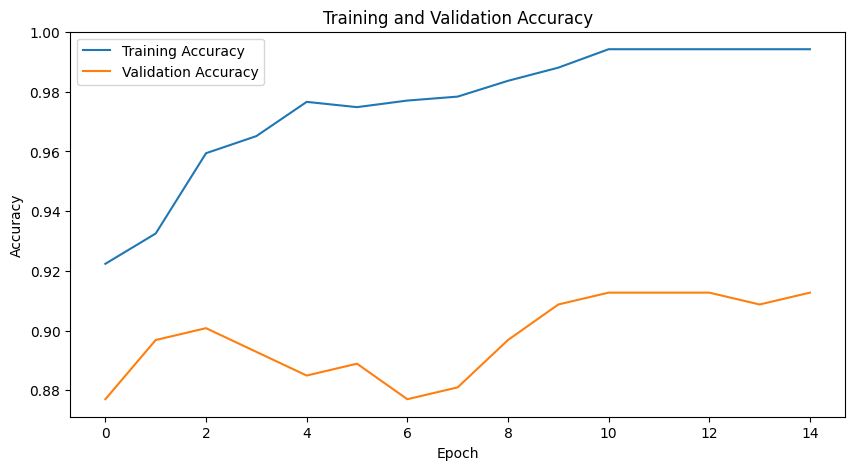

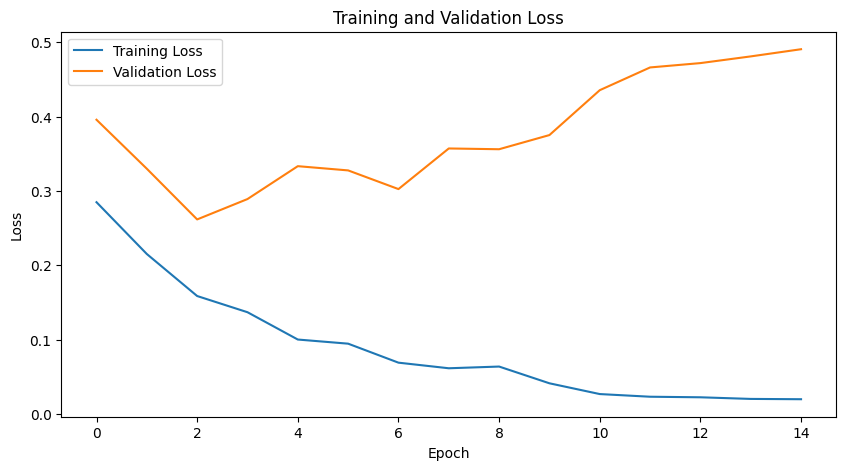

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


history_df = pd.DataFrame(model_2_history.history)

plt.figure(figsize=(10, 5))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_1_preds = model_2.predict(val_sentences)
model_1_preds = tf.squeeze(tf.round(model_1_preds))

accuracy = accuracy_score(val_labels, model_1_preds)
precision = precision_score(val_labels, model_1_preds)
recall = recall_score(val_labels, model_1_preds)
f1 = f1_score(val_labels, model_1_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step
Accuracy: 0.8810
Precision: 0.9099
Recall: 0.9593
F1-Score: 0.9339


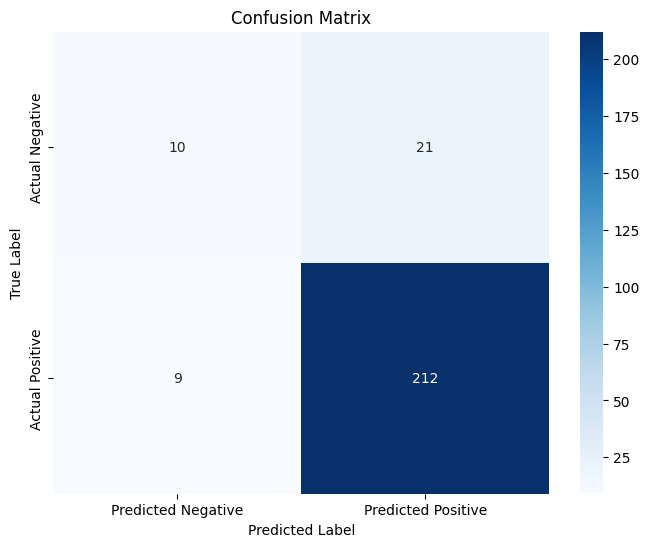

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(val_labels, model_1_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import tensorflow as tf

daniels_tweet = "i hate it i hate it i hate it"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)


    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Pred: 0.0 (negative) Prob: 0.002789034740999341
Text:
b'i hate it i hate it i hate it'


In [ ]:
import tensorflow as tf

daniels_tweet = "this product is the best"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)

    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Pred: 1.0 (positive) Prob: 0.9974748492240906
Text:
b'this product is the best'


In [ ]:
import tensorflow as tf

daniels_tweet = "i want to buy again"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)
    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Pred: 1.0 (positive) Prob: 0.821539044380188
Text:
b'i want to buy again'


In [ ]:
import tensorflow as tf

daniels_tweet = "need a refund"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)

    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Pred: 0.0 (negative) Prob: 0.4838097095489502
Text:
b'need a refund'


In [ ]:
import tensorflow as tf

daniels_tweet = "cancel my order"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)

    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Pred: 0.0 (negative) Prob: 0.08418125659227371
Text:
b'cancel my order'


In [ ]:
import tensorflow as tf

daniels_tweet = "!!!!"
user_input_tensor = tf.constant([daniels_tweet])

def predict_on_sentence(model, sentence):
    """
    Uses model to make a prediction on sentence.

    Returns the sentence, the predicted label and the prediction probability.
    """
    pred_prob = model.predict(sentence)

    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()

    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence[0]}")

predict_on_sentence(model=model_2,
                    sentence=user_input_tensor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Pred: 1.0 (positive) Prob: 0.8546124696731567
Text:
b'!!!!'
